In [1]:
#langchain architectures is installed
#!pip install langgraph langsmith langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 21.9 MB/s eta 0:00:00


In [2]:
groq_api_key = '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'


In [3]:
from langchain_groq import ChatGroq

In [4]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name='gemma2-9b-it')

In [8]:
from typing import Annotated
from typing import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END

In [21]:
class State(TypedDict):
  messages:Annotated[list,add_messages]
graph_builder = StateGraph(State)

In [22]:
def chatbot(state:State):
  return {'messages':llm.invoke(state['messages'])}

In [23]:
graph_builder.add_node('chatbot',chatbot)

In [24]:
graph_builder

In [25]:
graph_builder.add_edge(START,'chatbot')
graph_builder.add_edge('chatbot',END)

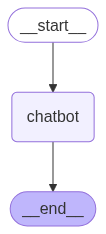

In [31]:
graph_builder.compile()

In [33]:
graph=graph_builder.compile()

In [36]:
while True:
  user_input= input("user:")
  if user_input.lower() in ['quit','q']:
    print('Good Bye,Thanks for using Langgraph framework')
    break
  for event in graph.stream({'messages':('user',user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print(('Assistant Radhika',value['messages'].content))

user:Generative AI job openings in 2025
dict_values([{'messages': AIMessage(content="It's impossible to predict the *exact* job openings in 2025, as the field is constantly evolving. However, based on current trends and projections, here are some potential generative AI job openings you might see in 2025:\n\n**Core Development & Research:**\n\n* **Generative AI Researcher:**  Developing new algorithms, models, and techniques for text, image, audio, video, and multi-modal generation.\n* **Machine Learning Engineer (Generative Focus):** Building and deploying generative AI models at scale, optimizing for performance, efficiency, and ethical considerations.\n* **Data Scientist (Generative AI):**  Analyzing large datasets to identify patterns and insights, training and evaluating generative models, and ensuring data quality for generation tasks.\n* **AI Ethicist (Generative AI):**  Addressing ethical concerns related to bias, fairness, misuse, and societal impact of generative AI technolog